In [1]:
# Running in Google Colab? Run this cell to download the data
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/type1a_sne.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2023-06-06 22:06:53--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/type1a_sne.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [text/plain]
Saving to: ‘type1a_sne.csv’

type1a_sne.csv      100%[===================>]     816  --.-KB/s    in 0s      

2023-06-06 22:06:53 (60.9 MB/s) - ‘type1a_sne.csv’ saved [816/816]



# The Expansion of the Universe

## Section 1: Background

In the early 20th Century, astronomers made a surprising discovery about the Universe that we're going to explore here. Astronomers were keenly interested in measuring the distances to "spiral nebulae" to understand whether they were a part of our galaxy, or extra-galactic (they would turn out to be extra-galaxies - separate galaxies on their own!). Astronomers were able to measure how fast those galaxies were moving towards or away from us.

We will recreate the work of Edwin Hubble, who plotted the distances and velocities of those galaxies against eachother. In this directory there is a file called "type1a_sne.csv" that has the measured distances (in units of mega-parsecs) and velocities (in km s$^{-1}$) for a number of galaxies. Load those data in to two lists:

## Section 2: Reading in data

We will use the file `type1a_sne.csv` which consists of galaxy data for in two columns: 
 - Measured distances (in mega-parsecs, Mpc), and 
 - velocities (in km s$^{-1}$). 
 
Load those data in to two NumPy arrays.

In [2]:
import numpy as np

sne_data = np.loadtxt('type1a_sne.csv', delimiter=',')
sne_distance = sne_data.transpose()[0]
sne_velocity = sne_data.transpose()[1]

# Make sure arrays are the same size
print(sne_distance.size)
print(sne_velocity.size)

56
56


Now, make a plot with distance on the x-axis any velocity on the y-axis. Make sure to include nice axes labels.

Text(0, 0.5, 'Velocity [km/s]')

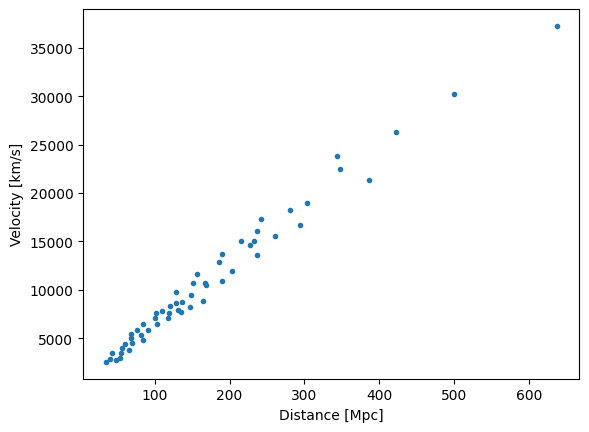

In [3]:
from matplotlib import pyplot as plt

plt.plot(sne_distance, sne_velocity, marker='.', linestyle='')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')

When using Doppler shifts, astronomers assign negative velocities to objects moving towards us, and a positive velocity to objects moving away from us.

For this set of galaxies, what trend do you notice?

In [4]:
# Comment here

Hubble discovered this relationship in 1929. All galaxies, regardless of where you look (outside of a few particularly close ones), are moving away from us. 

Our Universe is expanding!

## Section 3: How fast is the Universe expanding?

Let's calculate how quickly the Universe is expanding by fitting a line through the data points in your figure.

To accomplish this, we need to create the x and y values for the line.

First we need to create an array that spans the full domain of your previous figure.

In [5]:
# Create your array of x-values

model_distance = np.arange(0,601,50)

# Check that it's what we want
print(model_distance)

[  0  50 100 150 200 250 300 350 400 450 500 550 600]


We will consider the best straight line that fits the data in your figure. In this case, we will assume a straight line that uses the form $$y=m\,x,$$
where $m$ is the slope.

Create a function that will take $m$ and $x$ and will return $y$.

In [6]:
# Create a function
def hubble_line_function(m, x):
    return m * x

Now apply the function you created to the array of $x$ values you created earlier. For now, choose any number for $m$ and we'll change it later to best fit the data.

In [7]:
# Calculate y values
model_velocity = hubble_line_function(5, model_distance) # Random value for starting m

Now, let's re-create your plot of galaxy distances versus galaxy velocities from above:
 - Plot the the $x$ and $y$ values from the function as a line. 
 - If the line does not match the data plotted, adjust the value of the slope ($m$) until it does.

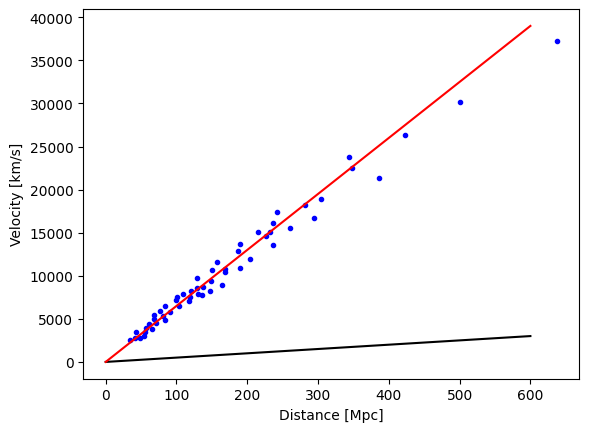

In [8]:
plt.plot(sne_distance, sne_velocity, marker='.', linestyle='', color='b')
plt.plot(model_distance, model_velocity, marker='', linestyle='-', color='k')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')

# Now let's try fitting the data by adjusting m until it fits
plt.plot(model_distance, hubble_line_function(65, model_distance), marker='', linestyle='-', color='r')

Let's record the value of the slope ($m$) of the line that agrees with the data. This is referred to as the Hubble Constant ($H_0$).

In [9]:
H0 = 65 # km/s/Mpc

Let's consider the units of the Hubble Constant. Look back at your equation for the line $y=m\,x$. Knowing that $y$ has units of km/s, and $x$ has units of Mpc, what must be the units of the Hubble Constant, $H_0$ (or $m$)? 

In [10]:
# Comment here

You might notice that they are (distance)/(time)/(distance), or to simplify, 1/time, or a frequency. Use dimensional analysis to reduce your value of $H_0$ to have dimensions of 1/time.

In [11]:
# Restate your H0 using only units of time.
# Pay attention to units!

# 1 Mpc = 1e6 pc
# 1 parsec = 3.08567782e16 m

hubble_frequency = H0 * 1e3 / (1e6 * 3.08567782e16) # km/s/Mpc x (km -> m) / (Mpc -> pc -> m) = 1/s = [1/time - a frequency]


Use the fact that $1/H_0$ has units of time to calculate the age of the Universe in years. This is referred to as the Hubble Time.

In [12]:
hubble_time_seconds = 1 / hubble_frequency
print(f'The age of the Universe in our simple model is {hubble_time_seconds:.2e} seconds.')

# Convert to years
hubble_time_years = hubble_time_seconds / 3.1536e7
print(f'The age of the Universe in our simple model is {hubble_time_years:.2e} years.')

The age of the Universe in our simple model is 4.75e+17 seconds.
The age of the Universe in our simple model is 1.51e+10 years.


The Hubble Time is an estimate of the age of a Universe that _has no matter in it_. This cannot be the case because we are sitting here today. For a Universe with matter in it, the gravity from that matter tends to counter the expansion of the Universe, and slow it down. 

A more detailed calculation shows that for a Universe with enough matter that the Universe coasts at a constant speed, the age of the Universe is more accurately calculated as $2/(3\,H_0)$:

![Universe expansion](https://github.com/mcstroh/REACHpy/blob/ideaspy_updates/Module_2/images/expanding_universe.png?raw=1)

Use that formula to calculate a more accurate age of the Universe from your Hubble Constant:

In [13]:
# Convert to years
hubble_time_years = 2/3/hubble_frequency / 3.1536e7
print(f'The age of the Universe in our simple model is {hubble_time_years:.2e} years using a more complex model.')

The age of the Universe in our simple model is 1.00e+10 years using a more complex model.


This is one of a few different ways to calculate the age of the Universe, and our current best measurement from the Planck satellite is 13.8 billion years, and their Hubble constant is about 68 km/s/Mpc. How do your numbers compare?

In [14]:
# Comment here



If you numbers are different, you aren't alone! It turns out one of the interesting problems in astronomy today is that different ways of measuring the Hubble Constant get slightly different answers. 

![Best H_0 calculations](https://github.com/mcstroh/REACHpy/blob/ideaspy_updates/Module_2/images/freedman.png?raw=1)

Although the differences are small, they are also significant. Why are they different? One comes from distances to galaxies, in the same way that you calculated the Hubble Constant here. The other comes from density fluctuations in the early universe when it was only 380,000 years old (cool!). Maybe there's some physics we don't understand creating the discrepancy. Or, maybe we are systematically measuring something incorrectly and we just don't know.